In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (10, 10))

In [68]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [69]:
path = "C:\\Users\\vinic\\Documents\\GitHub\\Enem\\2018\\Microdados_2018_MG_Tratado.csv"


In [70]:
dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

# Agrupar faixas de Renda Q006
## De A ~ E -> Grupo 1
## De F ~ N -> Grupo 2
## De O ~   -> Grupo 3

In [132]:
var = "Q006"
dadosEnem[var].replace(to_replace =['A','B','C','D','E'], 
                 value ="1",inplace=True) 
dadosEnem[var].replace(to_replace =['F','G','H','I','J','K','L','M','N'], 
                 value ="2",inplace=True) 
dadosEnem[var].replace(to_replace =['O','P','Q'], 
                 value ="3",inplace=True) 
var = "Q027"
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Publica",inplace=True) 
dadosEnem[var].replace(to_replace =['B', 'C'], 
                 value ="Parcial Particular",inplace=True) 
dadosEnem[var].replace(to_replace =['D', 'E'], 
                 value ="Totalmente Particular",inplace=True) 

var = 'TP_DEPENDENCIA_ADM_ESC'
dadosEnem[var].replace(to_replace =[1.0], 
                 value ="Federal",inplace=True) 
dadosEnem[var].replace(to_replace =[2.0], 
                 value ="Estadual",inplace=True) 
dadosEnem[var].replace(to_replace =[3.0], 
                 value ="Municipal",inplace=True) 
dadosEnem[var].replace(to_replace =[4.0], 
                 value ="Particular",inplace=True) 

var = 'Q025'
dadosEnem[var].replace(to_replace =['A'], 
                 value ="Não",inplace=True) 
dadosEnem[var].replace(to_replace =['B'], 
                 value ="Sim",inplace=True) 

In [72]:
dadosEnem[var].value_counts()

Publica                  81838
Totalmente Particular    15495
Parcial Particular       10292
Name: Q027, dtype: int64

Text(0.5, 0, ' ')

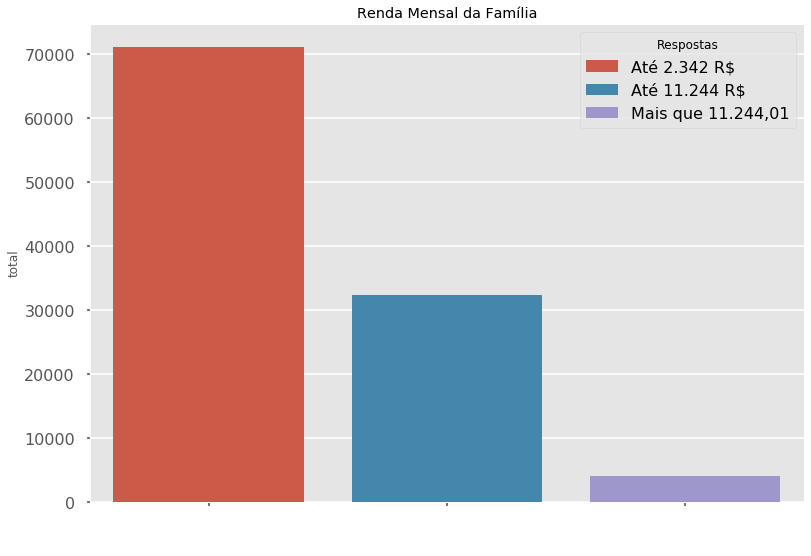

In [73]:
area = plt.figure()

var = "Q006"
contagem_de_questionario = dadosEnem[var].value_counts().to_frame().reset_index()
contagem_de_questionario.columns = ["Respostas","total"]
contagem_de_questionario.Respostas = ['Até 2.342 R$','Até 11.244 R$','Mais que 11.244,01']
contagem_de_questionario



g = sns.barplot(x="Respostas", y = "total", data = contagem_de_questionario, hue = "Respostas",dodge = False)
g.set_title('Renda Mensal da Família')
g.set_xticklabels(" ")
g.set_xlabel(" ")

In [74]:
agrupado = dadosEnem.groupby('Q006')

# Analisando Faixas de Renda

In [114]:
Grupo_1 = agrupado.get_group("1")
Grupo_2 = agrupado.get_group("2")
Grupo_3 = agrupado.get_group("3")

In [115]:
def my_distplot(Grupo,var,G):
    G = sns.distplot(Grupo[var],kde=False, rug=True)
    G.set(xlabel=' ')
    #plt.title('Quantidade de pessoas na casa')

In [116]:
def my_function(Grupo,var,G):
    array = pd.DataFrame(Grupo[var].value_counts())
    array2 = pd.DataFrame(Grupo[var].value_counts(normalize=True) * 100).round()
    array['Porcentagem'] = array2


    tipo_escola = Grupo[var].value_counts().to_frame().reset_index()
    tipo_escola.columns = ["Respostas", "total"]
    tipo_escola.sort_index(axis=1, inplace=True)
    print(tipo_escola)
    #tipo_escola.Tipo_Escola = ['Pública ' + str(array['Porcentagem'][2]) + '%','Exterior ' + str(array['Porcentagem'][4]) + '%','Privada ' + str(array['Porcentagem'][1]) + '%','Não Respondeu ' + str(array['Porcentagem'][3]) + '%']
    total = float(len(tipo_escola))
    G = sns.barplot(x="Respostas", y = "total", data = tipo_escola)
    G.set_xlabel(" ")
    G.set_ylabel(" ")

               Respostas  total
0                Publica  64390
1     Parcial Particular   4465
2  Totalmente Particular   2348
               Respostas  total
0                Publica  17049
1  Totalmente Particular   9900
2     Parcial Particular   5471
               Respostas  total
0  Totalmente Particular   3247
1                Publica    399
2     Parcial Particular    356


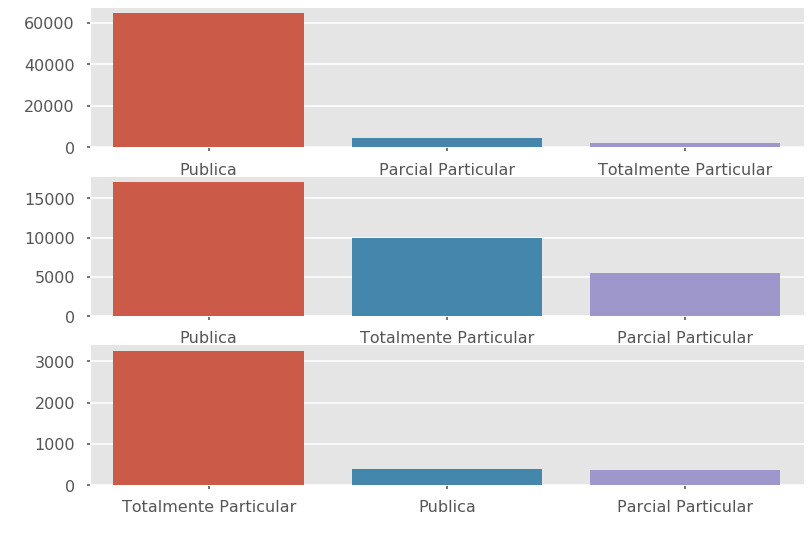

In [117]:
area = plt.figure()
var = 'Q027'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,'Q027',g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,'Q027',g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,'Q027',g3)





#g4 = area.add_subplot(2, 2, 4)


    Respostas  total
0    Estadual  63704
1  Particular   4138
2     Federal   2527
3   Municipal    834
    Respostas  total
0    Estadual  16491
1  Particular  12824
2     Federal   2726
3   Municipal    379
    Respostas  total
0  Particular   3471
1    Estadual    356
2     Federal    168
3   Municipal      7


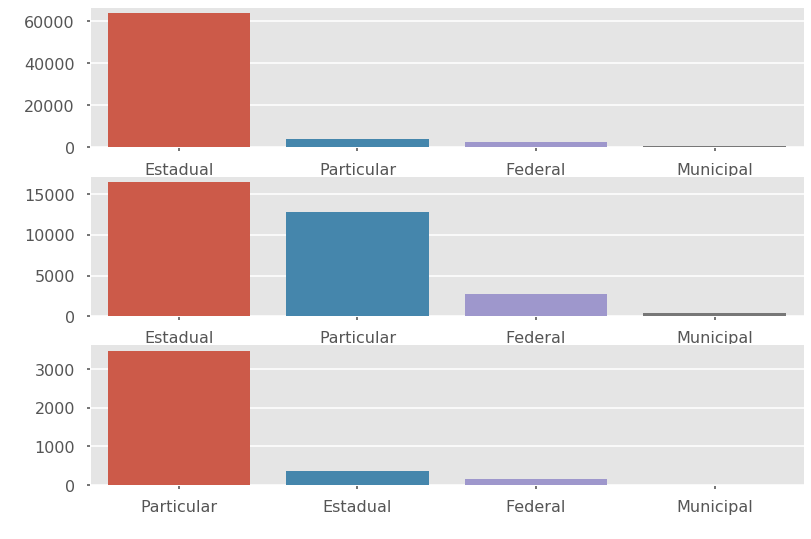

In [118]:

area = plt.figure()
var = 'TP_DEPENDENCIA_ADM_ESC'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)

#1	Federal
#2	Estadual
#3	Municipal
#4	Privada



  Respostas  total
0         B  53200
1         A  18003
  Respostas  total
0         B  31502
1         A    918
  Respostas  total
0         B   3984
1         A     18


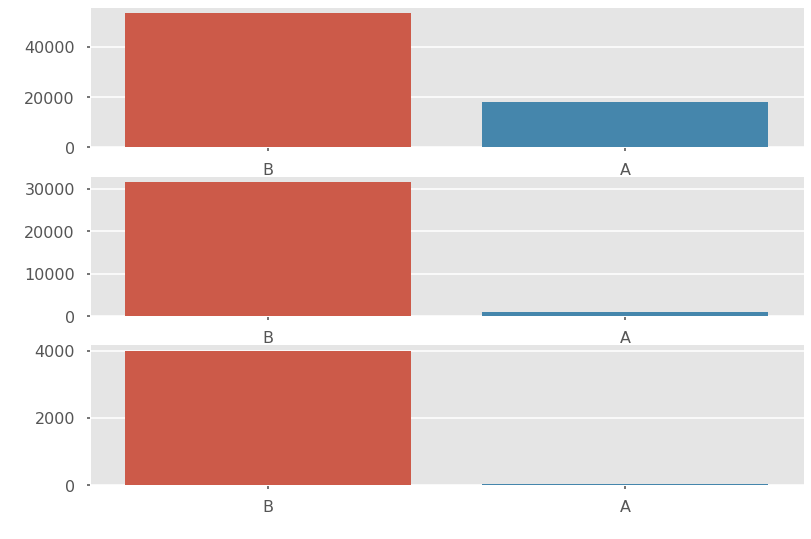

In [119]:
area = plt.figure()
var = 'Q025'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




  Respostas  total
0         B  37500
1         A  30404
2         C   2868
3         D    343
4         E     88
  Respostas  total
0         B  19976
1         C   6513
2         A   3214
3         D   2083
4         E    634
  Respostas  total
0         C   1230
1         B   1123
2         D    884
3         E    685
4         A     80


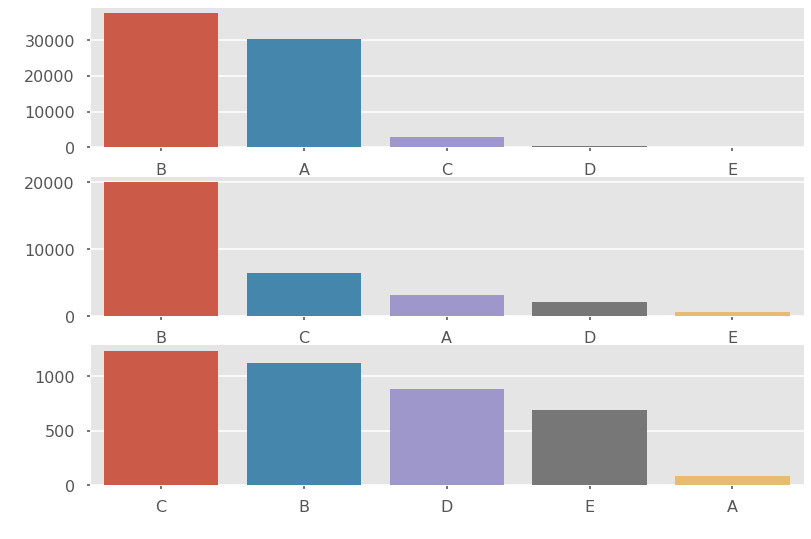

In [120]:
area = plt.figure()
var = 'Q024'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




  Respostas  total
0         C  23620
1         D  21924
2         B  13203
3         E  11178
4         A   1278
  Respostas  total
0         E  13427
1         D  12936
2         C   4752
3         B   1140
4         A    165
  Respostas  total
0         E   2588
1         D   1078
2         C    240
3         B     62
4         A     34


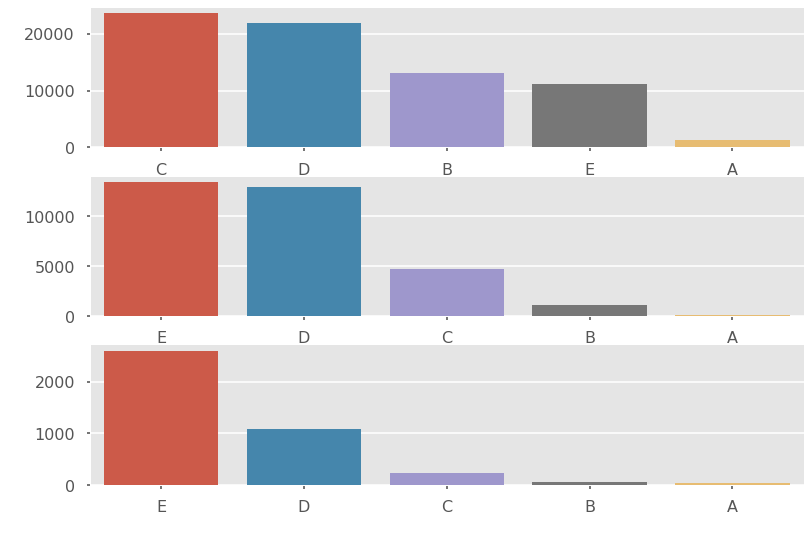

In [121]:
area = plt.figure()
var = 'Q022'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)




  Respostas  total
0         C  21764
1         B  16397
2         A  16385
3         F   8264
4         D   7606
5         E    787
  Respostas  total
0         D  13281
1         C   7892
2         E   4112
3         B   3720
4         F   1842
5         A   1573
  Respostas  total
0         E   2763
1         D    998
2         C     73
3         F     73
4         A     55
5         B     40


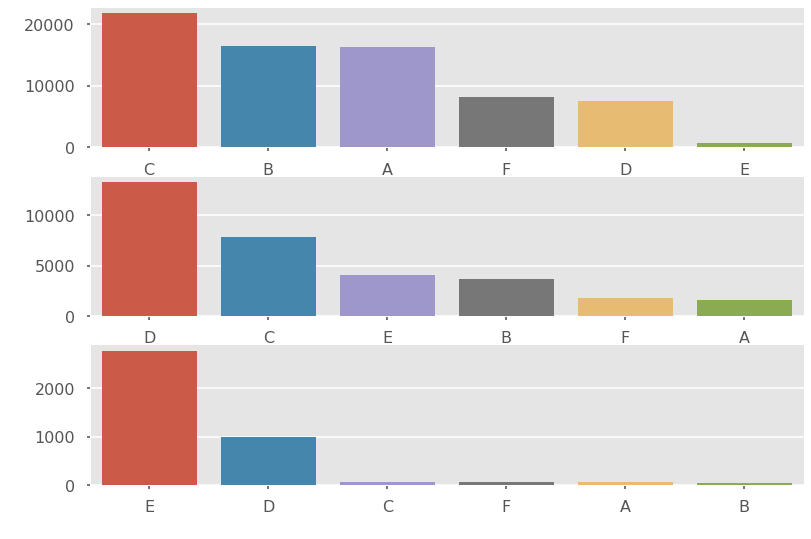

In [122]:
area = plt.figure()
var = 'Q003'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


  Respostas  total
0         B  38519
1         A  10396
2         D   9855
3         F   6045
4         C   5902
5         E    486
  Respostas  total
0         D  15349
1         B   9165
2         E   2674
3         F   2574
4         C   1996
5         A    662
  Respostas  total
0         E   1846
1         D   1552
2         F    288
3         B    239
4         C     51
5         A     26


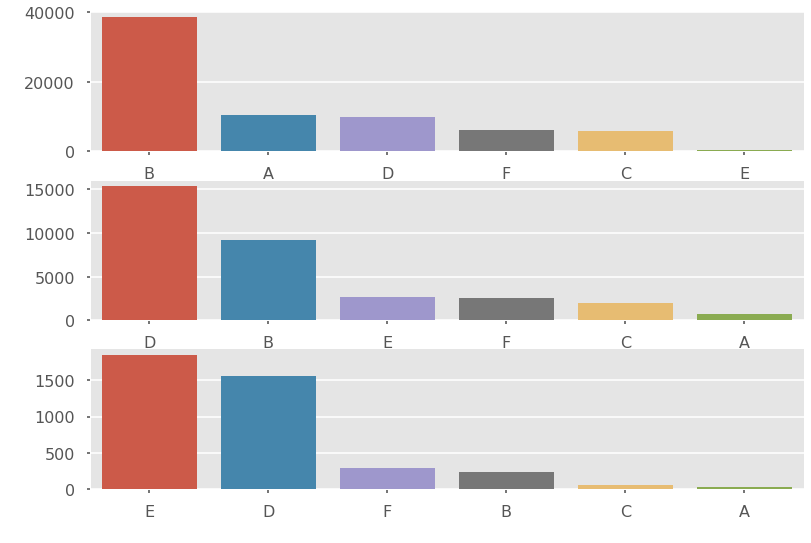

In [123]:
area = plt.figure()
var = 'Q004'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


  Respostas  total
0         B  16492
1         E  16367
2         C  15547
3         D  10676
4         H   7077
5         F   2299
6         A   2006
7         G    739
  Respostas  total
0         E  12346
1         F   5701
2         D   4264
3         C   3552
4         G   3290
5         B   1934
6         H   1230
7         A    103
  Respostas  total
0         G   1862
1         F   1239
2         E    615
3         D    144
4         C     63
5         H     51
6         B     27
7         A      1


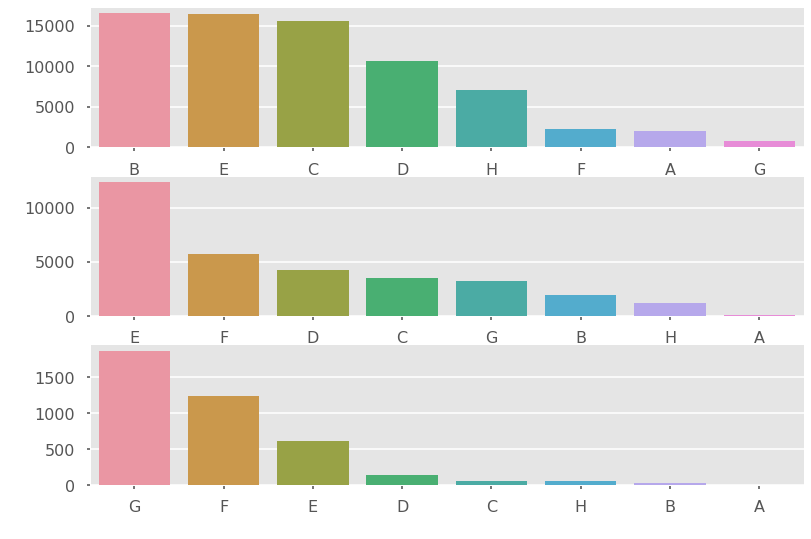

In [124]:
area = plt.figure()
var = 'Q001'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


  Respostas  total
0         E  23427
1         C  13767
2         D  12030
3         B  11636
4         F   4567
5         G   2278
6         H   2246
7         A   1252
  Respostas  total
0         E  11341
1         G   7025
2         F   6962
3         D   3190
4         C   2337
5         B   1016
6         H    481
7         A     68
  Respostas  total
0         G   1841
1         F   1274
2         E    667
3         D    106
4         C     59
5         H     37
6         B     14
7         A      4


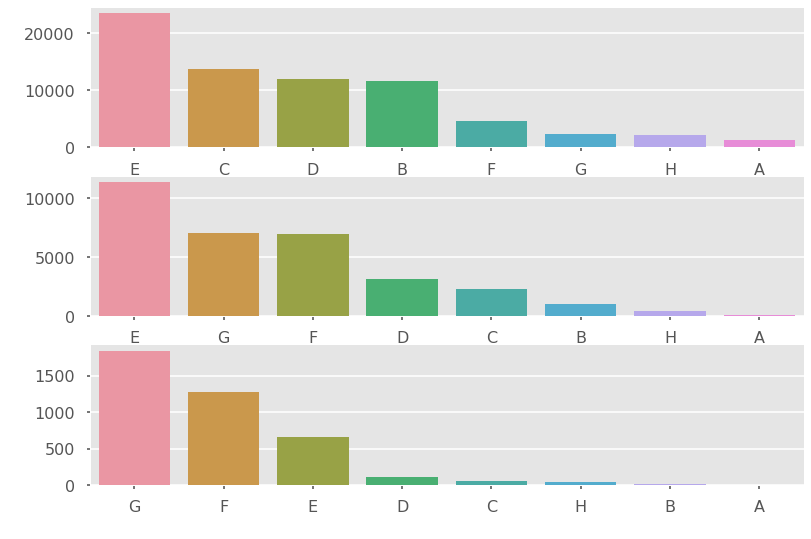

In [125]:
area = plt.figure()
var = 'Q002'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_function(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_function(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_function(Grupo_3,var,g3)


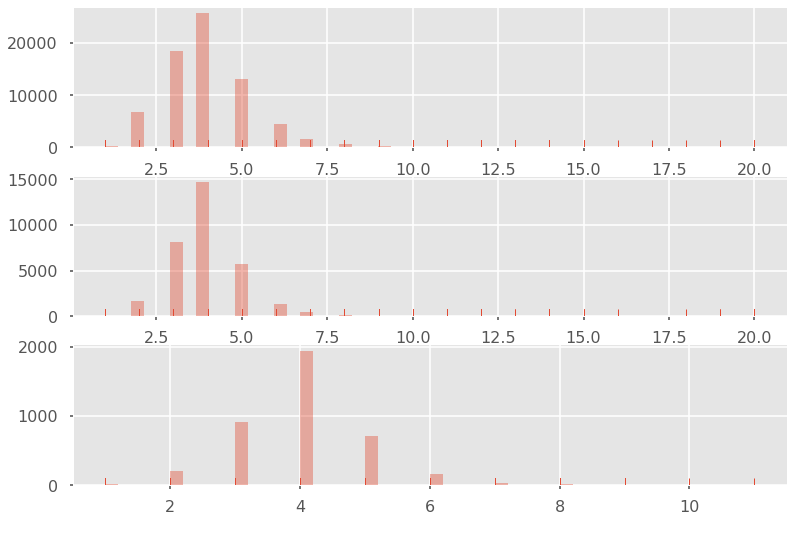

In [126]:
area = plt.figure()
var = 'Q005'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)




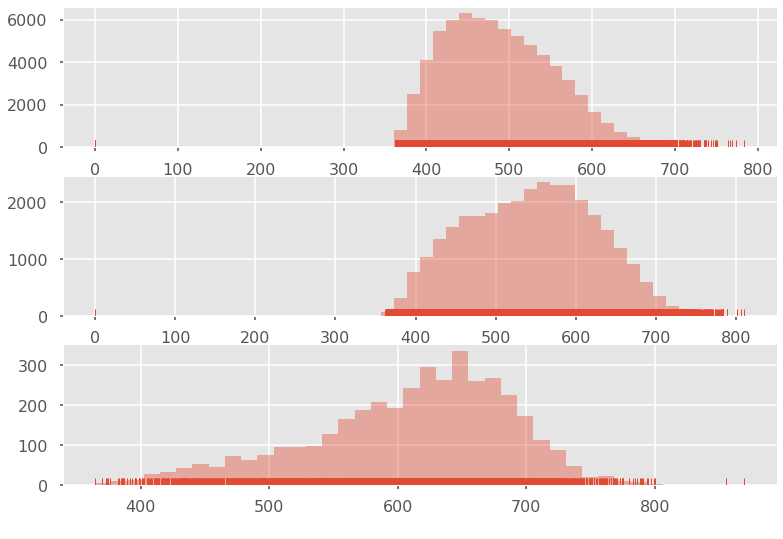

In [127]:
area = plt.figure()
var = 'NU_NOTA_CN'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

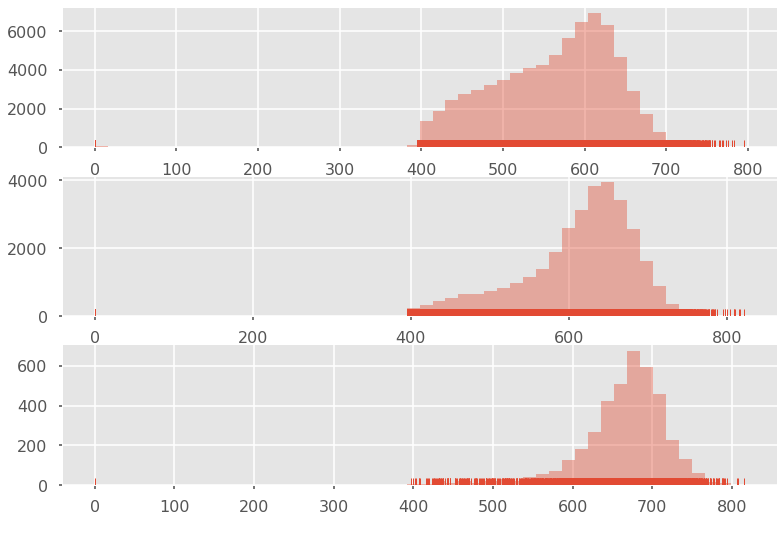

In [128]:
area = plt.figure()
var = 'NU_NOTA_CH'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

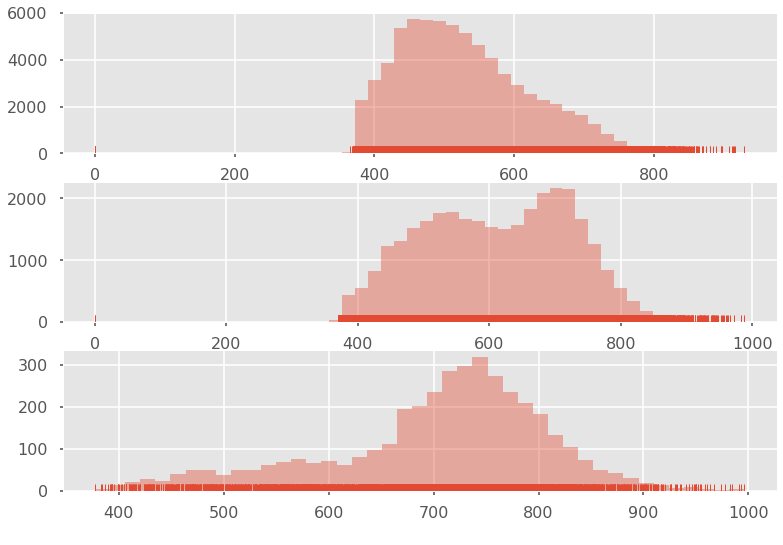

In [129]:
area = plt.figure()
var = 'NU_NOTA_MT'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

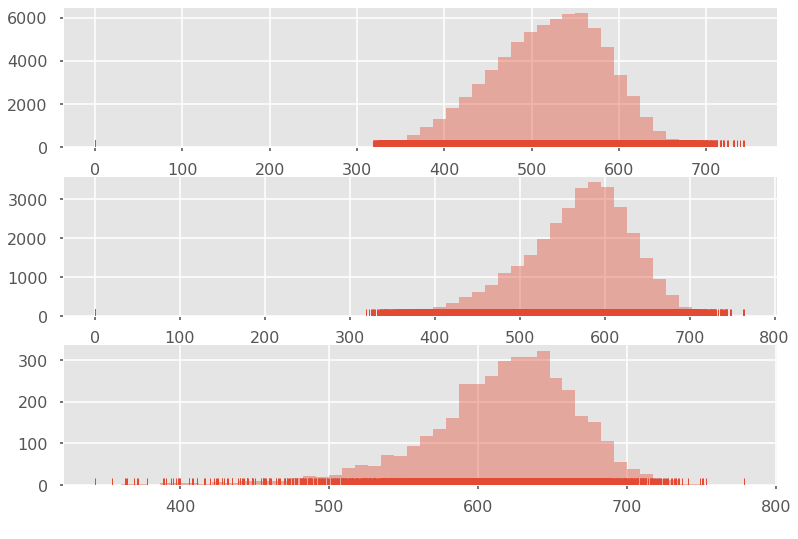

In [130]:
area = plt.figure()
var = 'NU_NOTA_LC'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)

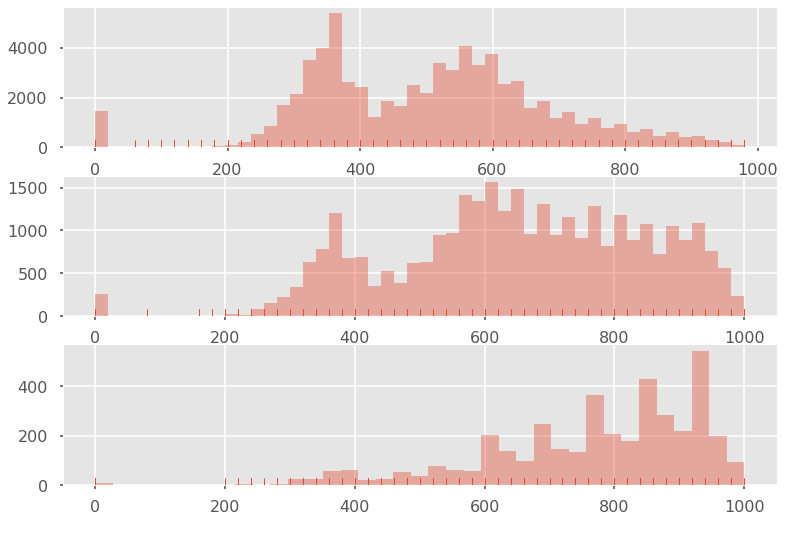

In [131]:
area = plt.figure()
var = 'NU_NOTA_REDACAO'

area.tight_layout(pad=10)

g1 = area.add_subplot(3, 1, 1)
my_distplot(Grupo_1,var,g1)


g2 = area.add_subplot(3, 1, 2)
my_distplot(Grupo_2,var,g2)

g3 = area.add_subplot(3, 1, 3)
my_distplot(Grupo_3,var,g3)